<a href="https://colab.research.google.com/github/Morax19/ML_UCV/blob/main/Parcial1/01_Parcial_Pregrado_II_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 Parcial teórico 1

## Aprendizaje Automático Postgrado [UCV]


* Alumno: Daniel Hernández
* Cédula: 27795163
----


El examen consta de dos secciones una teórica y una práctica.


Me interesa entender su comprensión de los temas por lo que el examen es 100% a libre a libro abierto pero debe justificar **todas** sus respuestas.

Si utilizó una referencia, coloque link (de ser online) o nombre de trabajo, autor/es y página (de ser una referencia escrita de libro o paper).
- De ser para la sección teórica, debe reescribir o parafrasear con sus propias palabras la sección que desea usar y porqué la usó en la pregunta.
- De ser para la sección práctica, comente lo más posible el código usado de un tercero.

-----

# Hora límite: 11:59 am Venezuela del Lunes 24/02/2024

Carguen el .rar asociado a su parcial como hicieron con las tareas anteriores en [Entregas](https://ml.ucv.ai/entregas)

# Preguntas teóricas (15 ptos, 1pto c/u)

## 1.1

Defina el error cuadrático medio y explique la razón por la cual es utilizado con mayor frecuencia en problemas de regresión.

### 1.1.b Respuesta

El error cuadrático medio es una función que calcula el promedio de la diferencia entre un valor esperado y un valor observado. Esta diferencia se eleva al cuadrado para garantizar que todos estos errores sean positivos, de forma que no se cancelen entre si.

Es usual que el ECM (MSE en inglés) sea usado como función de pérdida en problemas de regresión ya que nos indica que tan errado esta nuestro modelo al momento de realizar una predicción, además de esto, el ECM es una función diferenciable por lo que calcular los parámetros que la minimizan para encontrar nuestro modelo no resulta tan complejo.

## 1.2

Considere los siguientes gráficos de dispersión en un problema de regresión. Las líneas representan un modelo y cada imagen tiene datos de entradas distintos.

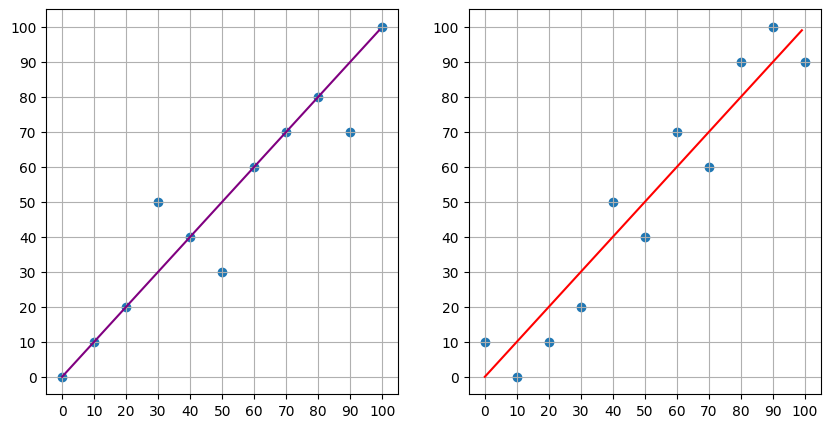

Cuál de los dos modelos tiene un error cuadrático medio inferior?
1. El modelo púrpura?
1. El modelo rojo?
1. Tienen el mismo error cuadrático medio.
1. No es posible determinar el error cuadrático medio porque faltan datos.

### 1.2.b Respuesta

2. El modelo con el menor ECM es el modelo rojo, esto se puede saber si lo calculamos para ambos modelos y comparamos:

In [3]:
#Cálculo para el ECM
def ErrorCuadraticoMedio(Y_real, Y_pred, n_puntos):
    ECM = 0
    for i in range(n_puntos):
        ECM += (Y_real[i] - Y_pred[i])**2
    ECM = ECM/n_puntos
    return ECM

#Número de puntos
n = 11

#Valores obtenidos por el modelo
Y_pred = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#Valores reales en el caso púrpura
Y_real_p = [0, 10, 20, 50, 40, 30, 60, 70, 80, 70, 100]

#Valores reales en el caso rojo
Y_real_r = [10, 0, 10, 20, 50, 40, 70, 60, 90, 100, 90]

ECM_p = ErrorCuadraticoMedio(Y_real_p, Y_pred, n)
ECM_r = ErrorCuadraticoMedio(Y_real_r, Y_pred, n)

print(f"Resultados obtenidos:\nECM púrpura: {ECM_p}\nECM rojo: {ECM_r}")

Resultados obtenidos:
ECM púrpura: 109.0909090909091
ECM rojo: 100.0


## 1.3

 Supongamos tenemos que entrenar un modelo de aprendizaje supervisado para clasificar lanzamientos de un pitcher de béisbol en "buenos" y "malos".
Cuáles de las siguientes alternativas son correctas?

1. El modelo será entrenado en ejemplos sin anotaciones. Con anotaciones nos referimos a las clases "buenos" o "malos"
1. Los ejemplos no son confiables por lo que debemos mejorar los datos de entrada.
1. Los ejemplos sin anotaciones pueden ser usados en el conjunto de prueba. Asumiendo que provienen de la misma distribución que los datos anotados.
1. Velocidad del lanzamiento es la única variable útil para conseguir un modelo de buen redimiento. La velocidad, medida en millas, desde que la pelota abandona la mano del lanzador.


### 1.3.b Respuesta

De las opciones anteriores, las únicas correctas son la 2) y la 3).

1. Es incorrecto ya que nos encontramos ante un modelo de aprendizaje **supervisado**, esto implica que las anotaciones son necesarias para poder aprender a clasificar lanzamientos futuros.

2. Asumiendo que por "ejemplos" nos referimos a datos del conjunto de entrada, **es correcto** que debamos mejorarlos en caso de no ser confiables, puesto que si entrenamos un modelo con datos erróneos, la respuesta que obtendremos del mismo no será la deseada. Es decir, el modelo tendría un mal rendimiento no porqué haya entrenado mal o porqué este mal definido, sino porque "aprendió" usando datos que eran incorrectos.

3. **Es correcto**, si lo que se quiere es únicamente generar una predicción, ya que, si bien es cierto que estamos en un contexto de aprendizaje supervisado, una vez que el modelo está entrenado no son necesarias las anotaciones para que esté pueda emitir una respuesta dado un dato nuevo, por lo tanto pueden usarse estos ejemplos en el conjunto de prueba. Ahora bien, es necesaria una forma de corroborar a que clase pertenece la respuesta obtenida y para esto si se necesita conocer la anotación o  bien tener una agente externo que sea capaz de juzgar si el resultado obtenido corresponde a un lanzamiento "bueno" o "malo".

4. Es incorrecto puesto que para saber si un lanzamiento es bueno o malo también debe tenerse en cuenta la zona de impacto final, si cayo dentro o fuera de la zona de strike. De nada sirve un lanzador capaz de lanzar la pelota a 300mph si estas caen siempre en los pies del bateador.

## 1.4 Pregunta de clase 1

Gráfico tomado de [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

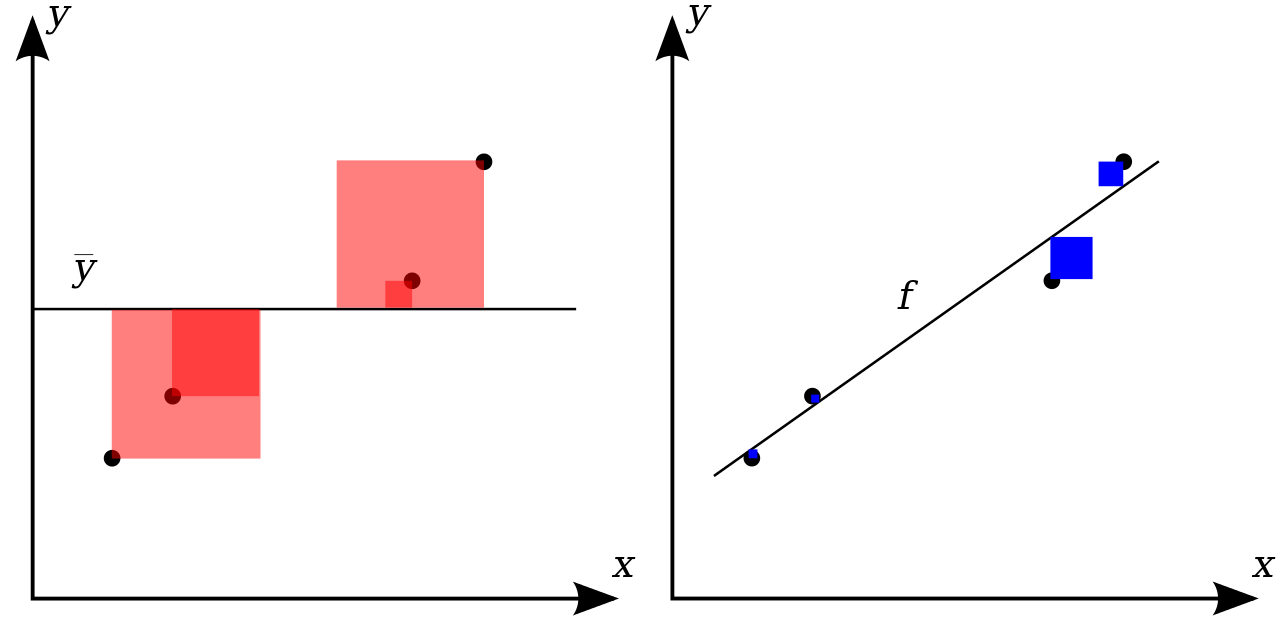

$$R^2=1-\frac{\color{blue}{S S_{\mathrm{res}}}}{\color{red}{S S_{\mathrm{tot}}}}$$

De donde $$\color{blue}{S S_{\mathrm{res}}} = \sum_i\left(y_i-f(x_i)\right)^2=\sum_i e_i^2  $$ y $$\color{red}{S S_{\mathrm{tot}}} = \sum_i\left(y_i-\bar{y}\right)^2 $$

1. Por qué usamos $\bar{y}$ en el denominador $\color{red}{S S_{\mathrm{tot}}}$?
1. Es el único posible valor que podemos usar?
1. Vean como el denominador es **constante** para todos los posibles modelos! Por qué?




### 1.4  Respuesta

1. Porque estamos buscando el mejor modelo posible de aquellos que no tienen ninguna información de la relación entre los datos de entrada (X) y los resultados obtenidos (y). Es decir, al calcular el coeficiente de determinación, estamos comparando el rendimiento de nuestro modelo con respecto al resultado real, es por ello que cuando se tiene la división de $\frac {S S_\mathrm{res}}{S S_\mathrm{tot}}$, realmente se está comparanda la suma de los errores al cuadrado de nuestro modelo ($S S_\mathrm{res}$) con un punto de partida base, para elegir a este caso base, se puede realizar la suma de los cuadrados de las diferencias entre los valores reales y cualquier costante posible, sin embargo entre todas estas opciones la más inteligente es escoger $\bar{y}$ o el promedio muestral de nuestros datos.

2. No, podemos usar cualquier valor diferente de $\bar{y}$, sin embargo carece de sentido puesto que esta nos da el caso base con el que comparar el rendimiento de nuestro modelo

3. Es constante para todos los posibles modelos porque no es un valor que dependa del mismo, el promedio muestral $\bar{y}$ va a depender exclusivamente de los datos.

## 1.5

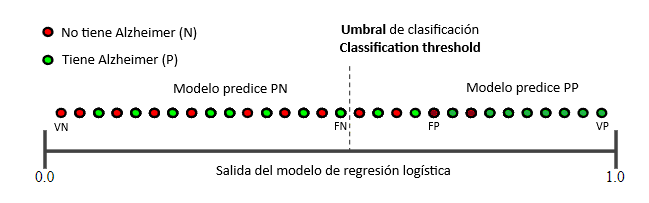

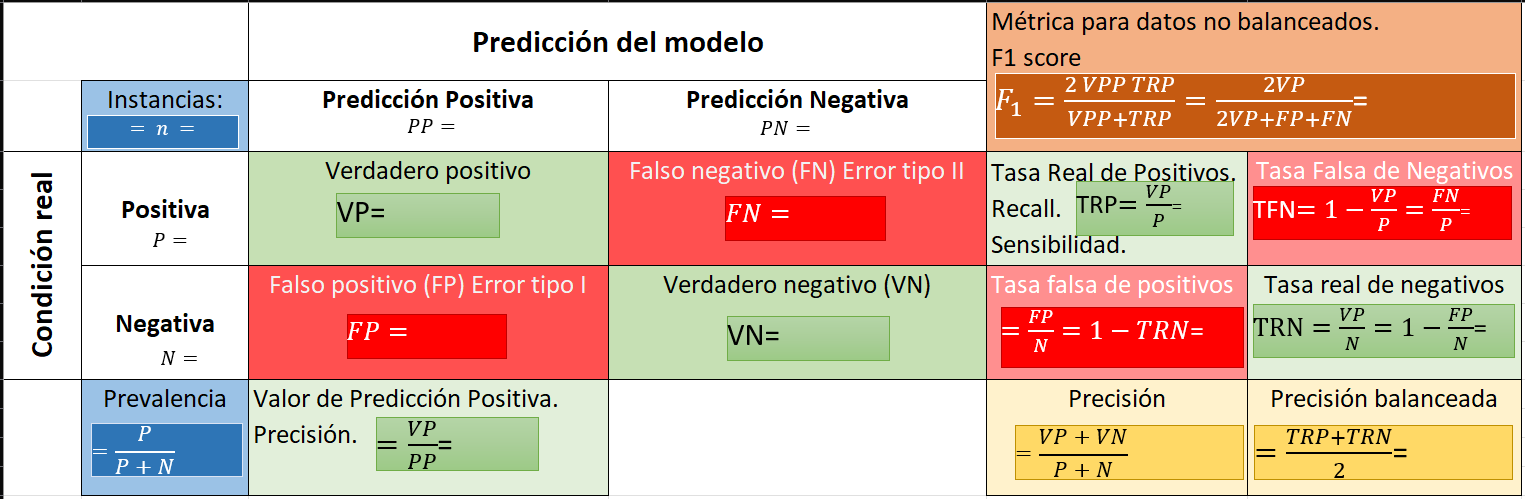

Asumiendo que cada punto tiene un score de salida del modelo de $\frac{k}{n}$ siendo $k$ el identificador del $k$-ésimo punto y $n$ el número de puntos. Responda:

1. Identifique $k$ si fuese el índice del punto inmediatamente superior al threshold asignado.
1. Cuál sería el score en ese punto?
1. Rellene la matriz de confusión y las métricas en el threshold asignado.
1. Asumiendo que el algoritmo de curvas ROC se encuentra en el umbral de clasificación. Explique detalladamente cómo cambiaría la matriz de confusión si iteramos 4 veces más en el algoritmo.
1. Cómo evaluaría el desempeño general del clasificador?

### 1.5  Respuesta

1.  k = 17
2.  El score en ese punto sería k/n, sustituyendo k y n como el número total de puntos se tiene: 17/30, aproximadamente 0.566666...
3.  Se tienen los siguientes valores para la matriz de confusión:

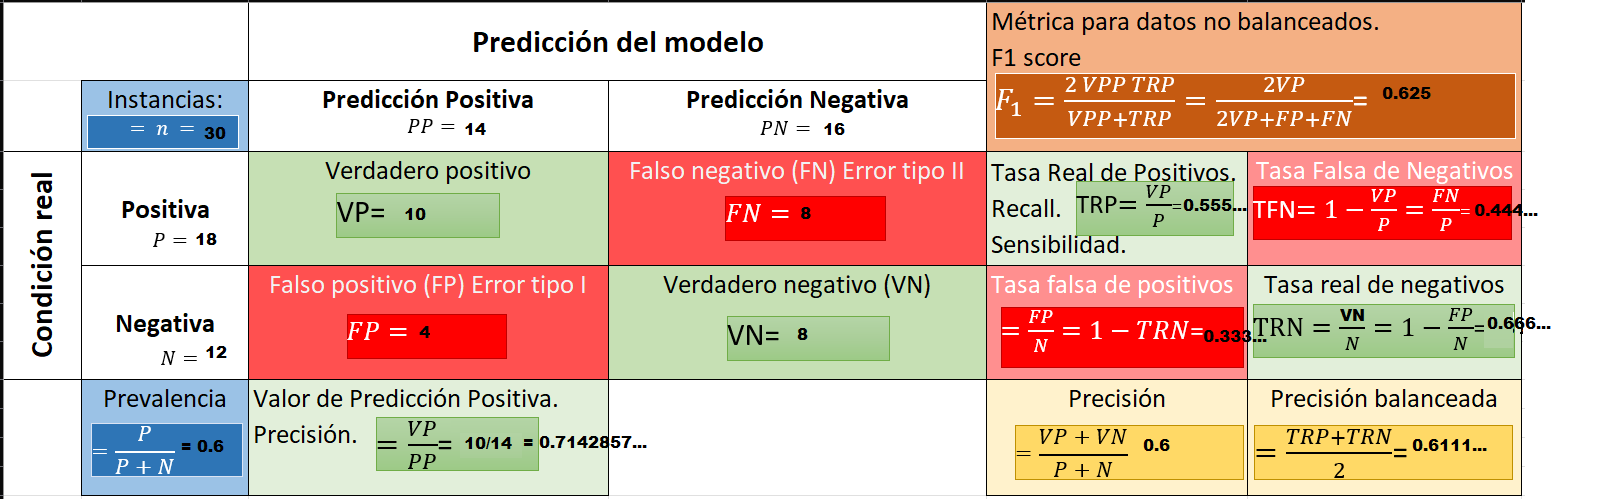

4. Los valores de la matriz de confusión correspondientes a cada iteración se presentan en la siguiente imagen:

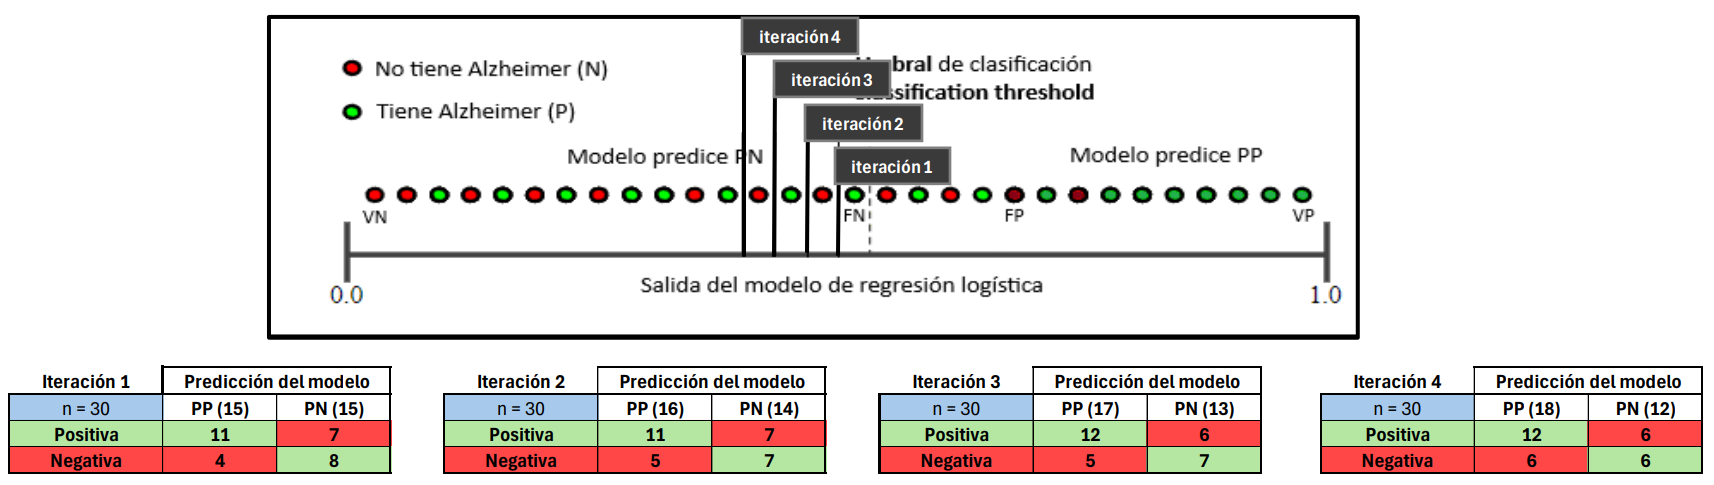

5. Para evaluar el clasificador podemos hacer uso de la métrica AUC o área bajo la curva ROC, sabiendo que si este valor es igual o cercano a 1, nuestro clasfificador tiene un buen rendimiento, si es¡l valor obtenido es igual a 0.5 es lo que se conoce como un clasificador aleatorio.

## 1.6 Pregunta clase 2

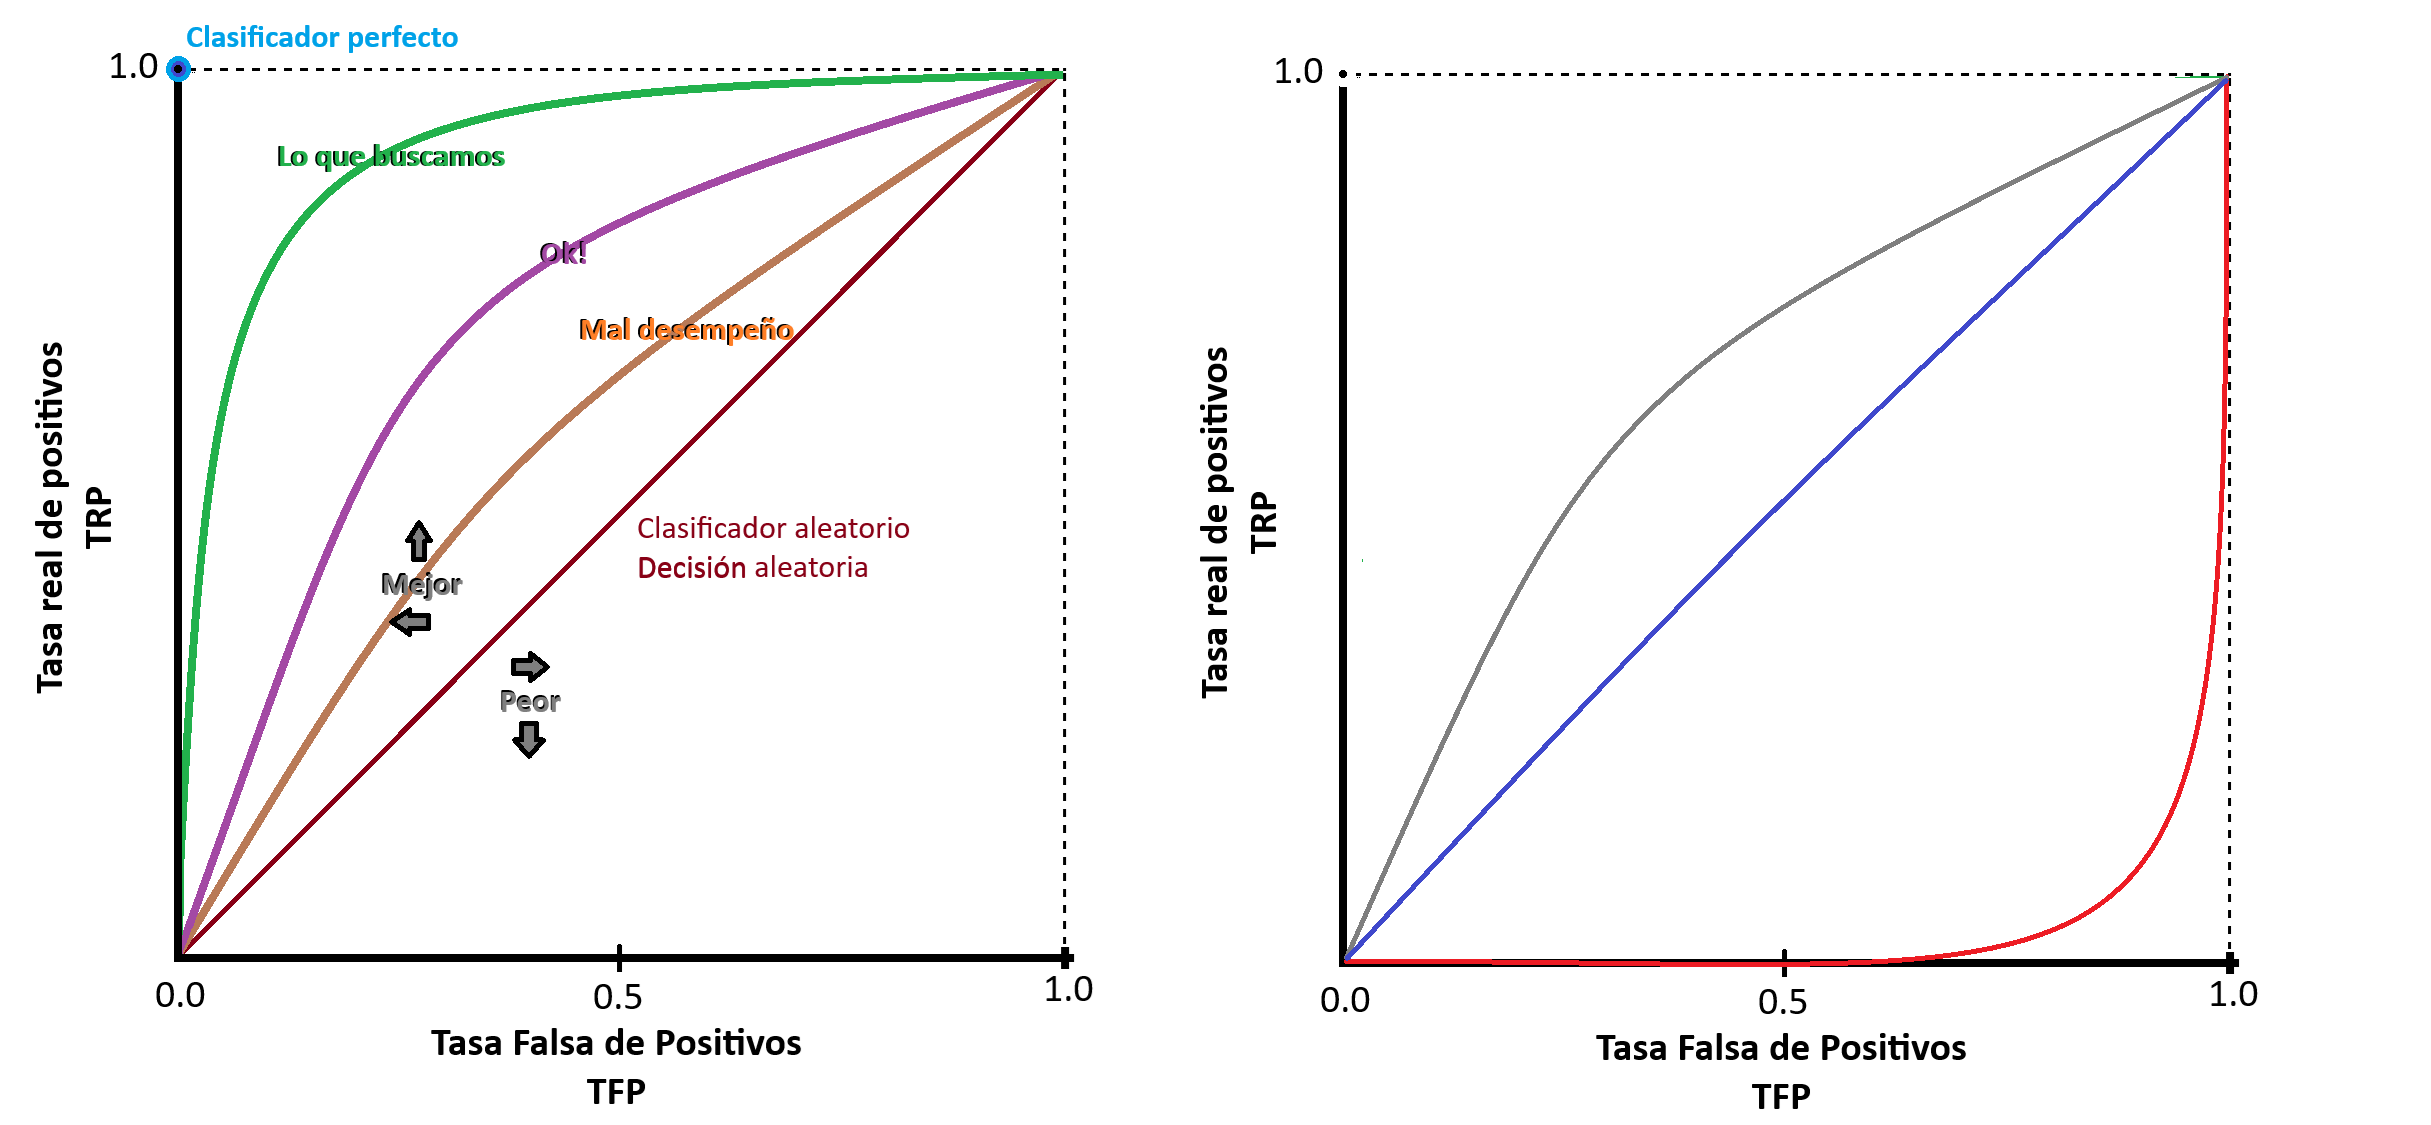

1. Por qué comparamos la Curva ROC con la línea TRP = TFP?
1. Por qué la llamamos decisión aleatoria?
1. En la curva ROC de la derecha, cuál de los tres modelos escogerían y por qué?
1. Dependiendo de la respuesta en 3. Qué habría que modificar en el modelo ganador?


### 1.6  Respuesta

1. Esta línea representa lo que conocemos como clasificador aleatorio, es decir, nuestro modelo asigna los datos a cualquiera de las 2 clases sin tener en cuenta ningún tipo de información. Se compara la curva ROC con este clasificador porque es el que tiene el peor rendimiento posible, por lo tanto, se usa como caso base para saber que tan diferente al peor caso posible estamos clasificando.

2. Porque al momento de clasificar un nuevo dato, se tiene la misma probabilidad de asignación para las 2 clases, también se puede ver como que por cada punto que calsificamos correctamente existe otro que clasificamos de forma incorrecta.

3. Se escoge el modelo de color rojo, porque es el que tiene un rendimiento más alejado de la clasificación aleatoria.

4. Se deben invertir las clases o los valores de las predicciones, de esta forma obtendremos el rendimiento deseado.

## 1.7

Mencione al menos 2 de las precondiciones sobre la matriz de datos $X$ que asumimos ciertas a la hora de conseguir un estimador $f^*$ de la función $f$ que generalice aceptablemente. Estas precondiciones siempre son respetadas? Mencione un ejemplo donde sea complicado seguirlas y cómo intentarías solucionarlo.

### 1.7  Respuesta

Algunas de las precondiciones que vimos en clases fueron:
* La matriz de datos $X$ debe tener inversa.
* La matriz de datos $X$ debe ser de rango completo.

En el primer caso, debemos recordar que para que una matriz sea invertible debe cumplirse que $X$ tenga dimensiones $n×n$, es decir, que sea una matriz cuadrada y se debe cumplir que $det(X) ≠ 0$, es decir, que su determinante sea diferente de 0. Puesto que $X$ es una matriz de datos no siempre podemos garantizar que tengamos el mismo número de instancias (filas) y de variables (columnas), una forma de solucionar esto puede ser tomar un subconjunto de las filas de la matriz $X$ y así tener el mismo número que las columnas, en otro caso podría ser utilizar herramientas de reducción de dimensionalidad como PCA para tener la misma cantidad de columnas que filas.

Para el segundo caso, puede suceder que tengas una matriz cuadrada con todos los valores distintos de 0, pero que no todas las filas sean linealmente independientes, en ese caso $X$ no sería una matriz de rango completo. Para solucionar esto, se me ocurre hacer uso nuevamente de herramientas como PCA para igualar el número de columnas al número de filas no redundantes, es decir, las filas que son linealmente independientes.

## 1.8

Imaginen que tenemos un modelo de clasificación con dos clases y aumentamos el umbral de clasificación. Qué sucede con la sensibilidad (TRP) del modelo?

1. Se puede mantener igual.
1. Siempre se mantiene constante ya que el umbral no afecta la sensibilidad.
1. La sensibilidad puede disminuir.
1. La sensibilidad puede aumentar.

Mencione un caso hipotético donde aumentar la sensibilidad tenga sentido.

### 1.8  Respuesta

Teniendo en cuenta que al aumentar el umbral nos referimos a llevar su valor lo más cercano a 1, visualmente sería desplazar el umbral de izquierda a derecha, además de esto es importante recordar que la **sensibilidad (TRP)** se define como: VP ÷ P.

Además debemos definir:
* **Verdadero positivio (VP):** Predicciones clasificadas como positivas y realmente lo son.
* **Falso positivo (FP):** Predicciones que pertenecen a la clase negativa pero se clasificaron como positivas.
* **Falso negativo (FN):** Predicciones que pertenecen a la clase positiva pero se clasificaron como negativas.
* **Verdadero negativo (VN):** Predicciones clasificadas como negativas y realmente pertenecen a esta clase.
* **Positivo (P):** El total de datos que pertenecen a la clase positiva.
* **Negativo (N):** El total de datos que pertenecen a la clase negativa.

Por lo tanto se tiene que:

1. Si, se puede mantener igual, ya que esto depende del punto que quede a la derecha del umbral, si este punto pertenece a la clase negativa pasa de ser un FP a un VN y esto no modifica de ninguna forma la sensibilidad.

2. Es falso, el umbral modifica la clasificación de los datos entre VN, FN, FP y VP, si vemos la definición de sensibilidad, esta depende de dicha clasificación.

3. Es cierto, la sensibilidad puede disminuir, ya que si tomamos el caso incial, es decir, con el valor del umbral en 0, todas nuestras predicciones son positivas, por lo tanto todas los datos que son realmente positivos se encuentran correctamente clasificados, haciendo que la sensibilidad sea igual a 1 (VP = P). A medida que movemos el umbral a la derecha, la sensibilidad puede disminuir cuando los datos VP se conviertan en FN.

4. Esto es falso, por lo explicando en el ítem anterior, al aumentar el umbral, la sensibilidad ya se encuentran en su valor más alto (1) debido a que todos los puntos VP se encuentran clasificados correctamente, a medida que el umbral aumente, solo tendremos puntos FP que pasen a ser VN o puntos VP que pasen a ser FN, por lo que la sensibilidad pueden mantenerse o disminuir, no aumentar.

Podemos tomar como ejemplo el caso planteado en la pregunta 1.5, pero también aplica si cambiamos el alzheimer por cualquier otra enfermedad.

Si reducimos el umbral de clasificación en busca de aumentar la sensibilidad, vamos a conseguir clasificar correctamente una mayor cantidad de personas que tienen alzheimer, esto es de vital importancia porque a pesar de que el rendimiento del diagnóstico sea peor (podemos tener más falsos positivos) estamos detectando una mayor cantidad de personas que realmente están enfermas por lo que es más probable que reciban la atención médica necesaria.

## 1.9
Asumiendo precisión como _accuracy_

Discuta sobre las siguiente ideas: "No todos los modelos con precisión alta funciona correctamente", "algunos modelos con precisión alta funcionan correctamente" y "en algunos casos es irrelevante si la precisión es alta o no". Dé ejemplos de modelos en donde la premisa sea correcta.
En el caso que consideres que la premisa no es correcta explica el porqué.

### 1.9  Respuesta

1. "No todos los modelos con precisión alta funcionan correctamente"

En este caso se puede tomar como ejemplo un modelo de clasificación binaria con las clases A y B, y además definimos el modelo tal que siempre clasifique los datos nuevos en la clase A, sin tomar en cuenta ningún tipo de información. Si probamos este modelo con un conjunto de datos que tiene un 98% de datos pertenecientes a la clase A y el resto a la clase B, se tendrá un valor alto para la precisión (98%) por pura suerte y no porque realmente estemos clasificando bien los datos.

2. "Algunos modelos con precisión alta funcionan correctamente"

La precisión es un indicador del comportamiento/rendimiento del modelo pero no condiciona al mismo, en este ítem se puede tomar como ejemplo alguno de los modelos realizados en la tarea #2, tanto el de reconocimiento de dígitos como el de reconocimiento de operadores, ambos modelos tenían un valor alto de precisión y funcionaban correctamente.

3. "En algunos casos es irrelevante si la precisión es alta o no"

Esta afirmación me parece incorrecta porque, si bien hay métricas que son más informativas que el accuracy como pueden ser precision, el recall o el F1 score; el accuracy irá ligado al rendimiento del modelo por lo que en ningún momento será completamente irrelevante.

## 1.10

Si tenemos dos modelos $M_1$ y $M_2$ entrenados en los mismos datos con los mismos splits. Dados los siguientes escenarios. En este caso precisión y sensibilidad se refieren a los valores en la métrica F1.

1. Si $M_2$ tiene mejor precisión que $M_1$ entonces $M_2$ funciona mucho mejor que $M_1$
1. Si $M_2$ tiene peor precisión y peor sensibilidad que $M_1$ entonces con alta probabilidad funciona peor que $M_1$
1. Si $M_2$ tiene peor sensibilidad que $M_1$ entonces $M_1$ funciona mucho mejor que $M_2$
1. Si $M_1$ tiene peor precisión y peor sensibilidad que $M_2$ entonces con alta probabilidad funciona peor que $M_2$

### 1.10  Respuesta

Para responder a esta pregunta debemos tener en cuenta a que nos referimos con precisión y sensibilidad:

* Precisión: Es la proporción de los valores clasificados correctamente (en cualquiera de las 2 clases) entre el total de datos disponibles. Matmáticamente se define de la siguiente forma: $\frac{VP + VN}{P + N}$

* Sensibilidad (recall): Mide la proporción de valores clasificados como positivos entre todos los que pertenecen a dicha clase, es decir, del total de valores pertenecientes a la clase positiva, cuantos han sido identificados correctamente. Matemáticamente se define como: $\frac{VP}{P}$

Por lo tanto, se tiene que las opciones correctas para responder a esta pregunta son:

2. Si $M_2$ tiene peores valores para la precisión y la sensibildad en comparación con $M_1$ quiere decir que, de todas las instancias positivas $M_2$ logra identificar una menor cantidad en comparacion a $M_1$ (recall), de igual forma para la precisión, el hecho de que $M_2$ tenga un puntaje más bajo que $M_1$ quiere decir que se cometieron mas errores al momento de clasificar los datos en algunas de las clases.


4. Sucede lo mismo que en el caso anterior, si $M_1$ tiene peor puntuación en precisión y sensibilidad que $M_2$ esto quiere decir que su rendimiento es peor para identificar las instancias verdaderamente positivas y en general comete más errores al clasificar los datos en cualquiera de las clases definidas.

## 1.11

Sea $X$ el conjunto de datos de entrenamiento con $(x_i, y_i) \text{ para } i \in \{1, \dots, n\}$ con:
1. $x_i \in \mathbb{R}^p$
1. $y_i \in \{-1, 1\}$


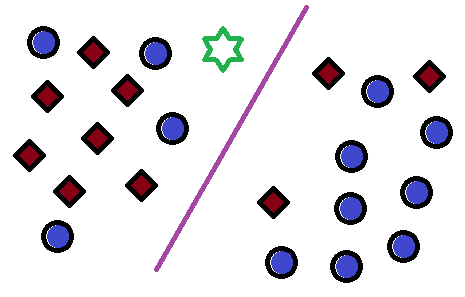


1. Cuál es el valor de $p$?
1. Cuál es el valor de $n$?
1. Si usamos SVM con la formulación hard-margin es posible hallar $w$?
1. Si usamos SVM con la formulación soft-margin y buscamos el modelo que le de énfasis al error de clasificación
     - Qué sucede con el margen?
     - Cuántos vectores soporte tendríamos?
     - Identifique en una imagen los vectores soporte.
1. Analice, el punto verde a cuál clase pertenece?

### 1.11  Respuesta

Antes de responder es necesario entender que $(x_i, y_i)$ es un par ordenado que tiene una instancia del dataset $x_i$ y su respectiva clasificación $y_i$

1. $p$ es el número de características que puede tener la instancia de nuestros datos, por lo que p equivale al número de columnas que tiene nuestro conjunto de datos. Para esta pregunta se tomara $p = 2$, siendo cada característica su posición en el eje X y el eje Y del plano cartesiano.

2. $n$ corresponde al total instancias en nuestro dataset, por lo tanto se obtiene contando la cantidad de puntos presentes en la imagen. En ese caso $n = 22$.

3. Si armamos un par de conjuntos A y B, donde A encierra a todos los circulos mientra sque B encierra a todos los rombos, podemos darnos cuenta de que  su intersección no es vacía por lo tanto los datos no son linealmente separables en $R^{2}$ es por esto que no es posible utilizar la formulación hard-margin, en consecuencia no se puede hallar $w$.

4. Para este caso se tiene
    * Dado que el modelo busca minimizar el error de clasificación, el valor de C hace que el margen se reduzca.
    * Tendríamos 4 vectores soporte puesto que estos se ven representados por los puntos que se encuentran sobre el margen.
    * Se muestran en la siguiente imágen:

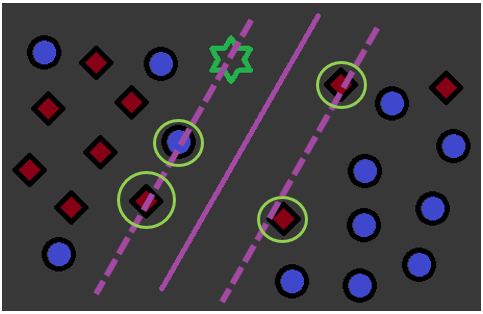

5. El punto verde pertenece a la clase de los rombos puesto que la distancia entre él y el margen izquierdo es menor que con respecto al margen derecho, a pesar de estar encima del margen (o un poco más a la derecha por efectos del dibujo), se le asigna la clase de rombo por estar usando formulación soft-margin.

## 1.12

Imaginen un modelo lineal con 200 variables (m) de las cuales solamente 30 son informativas. Le aplicamos regularización $ℓ_1$ (Lasso) y $ℓ_2$ (Ridge). Cuál o cuáles de las siguientes afirmaciones son correctas? Por simplicidad, asuma que todos lo valores de $X$ están en $[-1, 1]$

1. El modelo con regularización $ℓ_2$ tendrá muchos coeficientes de variables informativas alrededor del 0.
1. El modelo con regularización $ℓ_1$ tendrá pocos coeficientes de variables informativas exactamente en 0.
1. El modelo con regularización $ℓ_2$ tendrá pocos coeficientes no informativos alrededor de 0.
1. El modelo con regularización $ℓ_1$ tendrá muchos coeficientes no informativos exactamente en 0.

En general, cuál modelo será más "pequeño"? Esto es: número de coeficientes **distintos** de 0.

### 1.12  Respuesta

Antes de responder se debe recordar que la regularización $ℓ_1$ (Lasso) aplica el valor absoluto sobre el vector de coeficientes de nuestro modelo y es capaz de llevarlos a 0, es decir, que se pierda su información.

Mientras que que la regularización $ℓ_2$ (Ridge) aplica la función cuadrática al vector de coeficientes por lo que los mismos pueden tender a 0 pero en ningún momento alcanzan dicho valor, por tanto nunca se pierde completamente la información de los coeficientes por muy poco informativos que sean. Sabiendo esto y asumiendo que la penalización aplicada al modelo no es descabelladamente alta podemos responder:

1. Es incorrecto, los coeficientes de las variables informativas se verán penalizadas pero no tanto como los de las variables **NO informativas**.

2. Es **correcto**, al aplicar regularización $ℓ_1$ los coeficientes de las variables **NO informativas** pueden ser 0, sin embargo los de las variables informativas no deben verse tan penalizados. Puede que algunos coeficientes de variables informativas sean 0 pero eso dependerá de la fuerza de la penalización.

3. Es incorrecto, al aplicar regularización $ℓ_2$ los coeficientes de las 170 variables **NO informativas** tendrán valores cercanos a 0 por lo tanto es falso de decir que serán pocos los coeficientes no informativos cuyo valor esté al rededor de 0.

4. Es **correcto**, al aplicar regularización $ℓ_1$ es probable que muchos de los coeficientes de las 170 variables **NO informativas** se hagan 0.

## 1.13

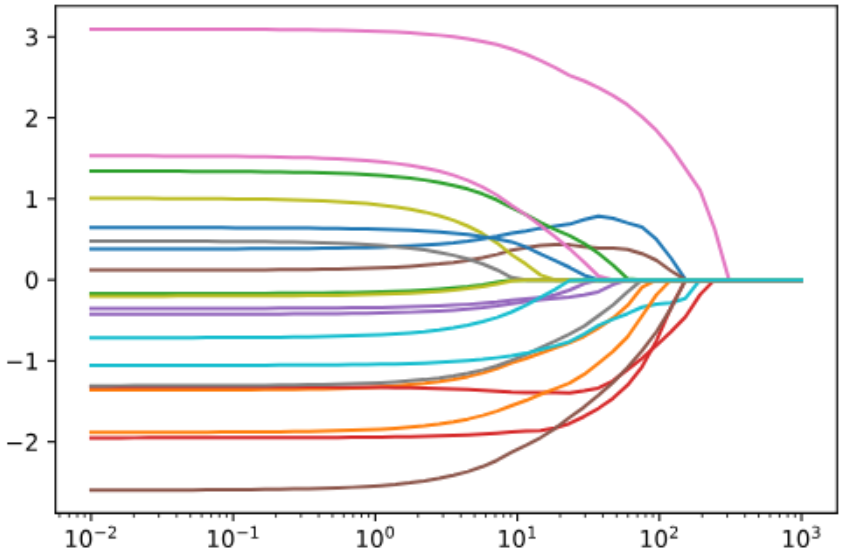

1. Explique la funcionalidad del camino de regularización cuando tenemos modelos lineales con regularización.
1. Investigue qué son redes elásticas? Escriba la función de pérdida de redes elásticas.
1.  Asumiendo que el camino de regularización mostrado en la imagen proviene de una red elástica. Infiera:
   - Estamos haciendo regularización con $ℓ_1$ (Lasso),  $ℓ_2$ (Ridge) u otra opción?
   - A partir de cuál valor del hiperparámetro estamos regularizando?
   - Qué sucede antes?



### 1.13  Respuesta

1. Cuando hablamos de regularización nos referimos a una forma de controlar la complejidad de un modelo de regresión, para esto multiplicamos los coeficientes del mismo, representados como $\beta^*$, por un valor $\lambda$ o un valor $S$. Cuando trabajamos con $\lambda$ los coeficientes se ven más penalizados a medida que este valor crece, es decir: $\lim_{\lambda \to \infty} \beta = 0$.
Mientras que si trabajamos con $S$, a medida que este valor aumenta, nuestros coeficientes se ven menos penalizados, es también lo que se conoce como que el problema esta "libre". La utilidad del camino de regularización es que nos permite visualizar el comportamiento de nuestro conjunto $\beta^*$ para distintos valores de $\lambda$ o $S$.

2. Las redes elásticas son un tipo de regularización que nos permite hallar un equilibrio entre las penalizaciones $ℓ_1$ y $ℓ_2$, ya que nos permite aplicar ambas a los coeficientes de nuestro modelo de regresión. Para esta técnica de regularización se tienen 2 penalidades diferentes correspondientes a $ℓ_1$y $ℓ_2$ respectivamente, estas son $\lambda_1$ y $\lambda_2$.
La función de perdida asociada entonces es: $f(\beta^*) = {||y - X\beta^*||^2_2} + {\lambda_1||\beta^*||_1} + {\lambda_2||\beta^*||^2_2}$

  [Referencia: Regularization Part 3: Elastic Net Regression](https://www.youtube.com/watch?v=1dKRdX9bfIo)

3. Para esta pregunta se tiene que:
  * Dado que el camino proviene de una red elástica, estamos aplicando ambas penalizaciones $ℓ_1$ y $ℓ_2$.
  * Podría decirse que comenzamos a regularizar a partir del valor $10^0$ puesto que es a partir de ese valor que gran parte de nuestros coeficientes comienzan a disminuir su valor.
  * Antes de alcanzar este punto, nuestro problema se encuentra libre.

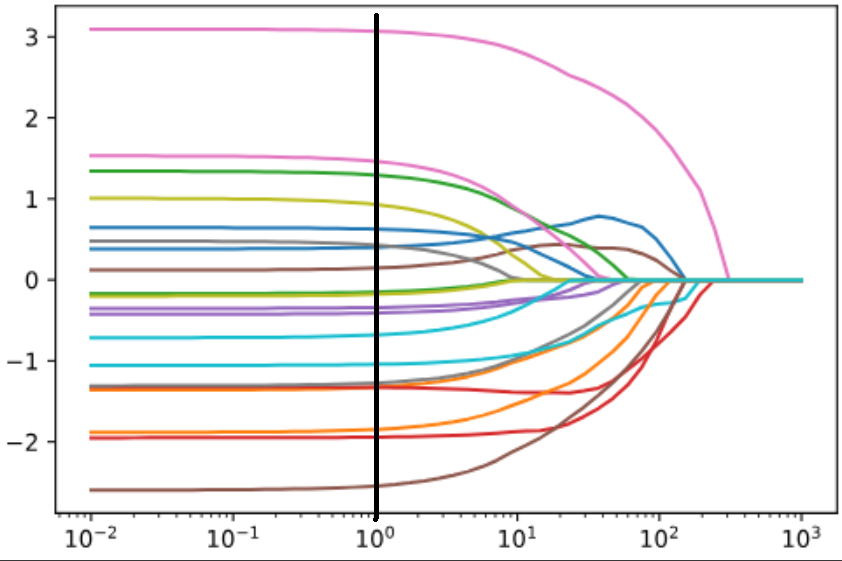

## 1.14


Se han entrenado dos modelos de aprendizaje automático, $M_1$ y $M_2$, utilizando el mismo conjunto de datos con los mismos **splits** de entrenamiento y validación. Para evaluar su rendimiento, se han generado **curvas de validación y aprendizaje**.
Con base en estas curvas, responde las siguientes preguntas:

1. Si $M_1$ y $M_2$ muestran errores de entrenamiento y validación altos que no disminuyen significativamente al aumentar la cantidad de datos de entrenamiento, qué tipo de problema podríamos estar enfrentando? Qué estrategias podrían aplicarse para mejorar el modelo?

2. Si $M_2$ muestra un error de entrenamiento significativamente menor que $M_1$, pero su error de validación es mucho mayor, qué podríamos inferir sobre la complejidad del modelo $M_2$? Cómo se reflejaría esto en la curva de validación y qué soluciones podríamos aplicar?

3. Si el error de validación de $M_1$ es constantemente alto, mientras que su error de entrenamiento es bajo y apenas varía con el tamaño del conjunto de entrenamiento, qué problema podríamos estar observando? Qué ajustes en el modelo podrían mejorar su rendimiento?

4. Si al aumentar el tamaño del conjunto de entrenamiento el error de validación de ambos modelos sigue bajando, pero aún no se estabiliza, qué recomendación darías sobre la cantidad de datos necesarios para entrenar un modelo adecuado?

### 1.14  Respuesta

JUSTIFIQUE SU RESPUESTA

## 1.15

Dado que se tienen dos modelos de aprendizaje automático, $M_1$ y $M_2$, entrenados en los mismos datos con los mismos splits:

1. Si $M_2$ tiene un error de entrenamiento más bajo que $M_1$, se puede afirmar con certeza que $M_2$ generalizará mejor en nuevos datos?
1. Si $M_2$ tiene un error de entrenamiento más bajo pero un error de validación más alto que $M_1$, qué conclusiones se pueden extraer sobre la capacidad de generalización de ambos modelos?
1. Si $M_2$ tiene un error de entrenamiento más alto pero un error de validación más bajo que $M_1$, qué implicaciones podría tener esto en términos de sesgo y varianza de los modelos?
1. Si tanto $M_1$ como $M_2$ tienen errores de entrenamiento y validación altos, cómo se podría interpretar esto en el contexto de sesgo y varianza?

### 1.15  Respuesta

JUSTIFIQUE SU RESPUESTA

# Parte Práctica (15 ptos)

Para todos los ejercicios, pueden utilizar todos los métodos de scikit learn excepto los que culminen con CV. Por ejemplo, [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)

In [1]:
# Agregar librerías acá
from sklearn.preprocessing import OneHotEncoder


### 1. Método del descenso del gradiente (5 ptos)

Supongamos el problema de mínimos cuadrados:

$$OLS\;\;\underset{\beta}{arg \; min}\;\;\frac{1}{2}\|\mathbf{\mathbf{y} - X \beta}\|_2^2\;\; \text{sujeto a}$$

$$\beta \in \mathbb{R}^p,\;\;y \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times p}$$

Dependiendo de las propiedades de $X$ tenemos una solución analítica que denominamos ecuaciones normales.

$$ X^T X \beta = X^T y \Rightarrow \beta^* = (X^T X)^{-1}X^T y $$

En la práctica, usamos métodos iterativos para poder aproximar (o conseguir de manera exacta) la solución $\beta^*$

El método más simple (aún cuando es optimal bajo una suposición sencilla) es el método del descenso del gradiente (_Gradient descent_)



### 1.1 Preliminares

Consideren una función $f$ sin restricciones, suave y convexa
$$
\min _x f(x)
$$

Es decir, $f$ es convexa y diferenciable con $\operatorname{dom}(f)=\mathbb{R}^q$.

Denotamos el valor optimal del problema como: $$f^{\star}=\min _x f(x)$$ y una solución como $x^{\star}$

### El algoritmo del descenso del gradiente

1. Escoja un punto inicial $x^{(0)} \in \mathbb{R}^q$
1. Para cada $k$:
$$
x^{(k)}=x^{(k-1)}-t_k \cdot \nabla f\left(x^{(k-1)}\right), \quad k=1,2,3, \ldots
$$
1. Mientras no haya convergencia o se cumpla un número finito de _pasos_ ($K$)

Con $t_k$ un parámetro dado que denominaremos el _paso_

## 1.2 Su trabajo

1. Investigar:
    - 1.1 Qué propiedad debe tener $f$, además de ser convexa y diferenciable, para que el algoritmo converja?
    - 1.2 Qué relación tiene con el paso $t_k$?
1. Implemente el algoritmo del descenso del gradiente para el caso de OLS y de Ridge regression.
    - Además del criterio por número de pasos, agregue un criterio de convergencia.
1. Identifique para cada caso:
  - 3.1 Quién es $f$?
  - 3.2 Quién es $q$ asumiendo la notación que hemos seguido en el curso? Es decir, cuál es la dimensión de $x$?
  - 3.3 Escriba analíticamente $\nabla f\left(x\right)$ para ambos casos.
1. Usando lo aprendido en 1.2, Escoja distintos pasos $t_k$ desde valores pequeños hasta valores grandes y analice los resultados dependiendo de cada paso.
1. **[Extra]:** En base a la propiedad 1.1 cuándo converje el método dependiendo de los valores de $t_K$ y $L$.  

## Solución

## 2. Parte práctica  (10 ptos)

Seguros Universitarios desea iniciar la unidad de análisis de datos para poder tener un módulo que los ayude a evaluar automáticamente un carro para poder asignar una póliza a un cliente nuevo. Para ello, te pide como evaluación de prueba que uses el conjunto de datos disponibles en [Kaggle Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset). Tienen una serie de problemas:

### Predicción de precio del vehículo:

1. Diseña y entrena un modelo de machine learning que permita predecir el precio de un vehículo en función de las variables disponibles en el conjunto de datos de Kaggle.
1. Explica qué tipo de modelo recomendarías (por ejemplo, regresión lineal, árboles de decisión, etc.) y por qué.
1. Justifica qué métricas utilizarías para evaluar el desempeño del modelo.

### Enriquecimiento de datos con una API externa:

1. Dado que la empresa considera que los datos disponibles son limitados, te piden que amplíes la cantidad de información usando la API de [API Ninjas car](https://api-ninjas.com/api/cars).
1. Indica qué variables adicionales de la API considerarías relevantes para mejorar la predicción del precio y por qué.
1. Explica cómo integrarías esta información en el dataset original.
1. Tienen preocupación acerca del pago del API. Ven que las primeras 10.000 peticiones son gratuitas. Nuestro dataset tiene 10000 entradas. Existirá algún problema asociado?

### Clasificación de vehículos en "De lujo" y "Gama media y baja":

1. Diseña un modelo de clasificación que permita diferenciar los vehículos entre dos categorías: "De lujo" y "Gama media y baja".
1. Justifica qué criterios y variables utilizarías para definir si un vehículo es de lujo o no.
1. Explica cómo evaluarías el desempeño del modelo y qué técnica de validación emplearías.

### Vehículos de impacto

1. Identificar qué vehículos tienen un impacto crítico en la definición de la frontera de decisión del modelo y analizar sus características.
1. Presentar los resultados en un formato claro (tabla o gráfico) y explicar qué patrones o tendencias observas en estos vehículos.
1. Reflexionar sobre cómo esta información puede ser utilizada para mejorar la clasificación en futuros modelos.

### Descargar los datos

In [2]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 13.3 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15130 sha256=7263199dbf11f99c52541670b6a38d3a5a560a85f018c43740d9f03812671ad5
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


In [52]:
import mlcroissant as mlc
import pandas as pd

# Usando Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/asinow/car-price-dataset/croissant/download')

# Check de record sets
record_sets = croissant_dataset.metadata.record_sets

# Obtener el record set
cars = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))

# Modificar columnas del df eliminando el preámbulo
cars.columns = map(lambda x: x.replace("car_price_dataset.csv/", ""), cars.columns)

for column in cars.dtypes[cars.dtypes == 'object'].index:
  cars[column] = cars[column].apply(lambda x: x.decode("utf-8"))

# Transformar columnas de bytes a String
cars.dtypes

cars.head()

  -  [Metadata(Car Price Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Función de ayuda

El recruiter de la aseguradora menciona que sería útil utilizar esta función [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Para qué cree que podríamos usarla? Investigue y prueba 1 alternativa al problema que resuelve.

### Usando el API

Tomen en cuenta que la API_KEY la pueden generar fácilmente en el sitio.

In [87]:
import requests
import json

def get_car_specs(model, year, API_KEY='2gyf3BYsBYFGHTkEASb2Qg==nvKPMgkrSA3KBEgS'):
  BASE_API_URL = f'https://api.api-ninjas.com/v1/cars?model={model}&year={year}'
  response = requests.get(
      BASE_API_URL,
      headers={'X-Api-Key': API_KEY}
  )

  if response.status_code == requests.codes.ok:
      #Para efectos del ejercicio 2 de la parte práctica se modifica la respuesta
      if response.text != '[]':
        return json.loads(response.text)[0]
      else:
        return None
  else:
      print("Error:", response.status_code, response.text)

In [37]:
from pprint import PrettyPrinter as pretty

pp = pretty(indent=3)

kia_rio = get_car_specs(model="rio", year=2020)

pp.pprint(kia_rio)

{  'city_mpg': 33,
   'class': 'compact car',
   'combination_mpg': 36,
   'cylinders': 4,
   'displacement': 1.6,
   'drive': 'fwd',
   'fuel_type': 'gas',
   'highway_mpg': 41,
   'make': 'kia',
   'model': 'rio',
   'transmission': 'a',
   'year': 2020}


### Solución 2.

#### Predicción del precio del vehículo.

Primero debemos observar que tenemos variables en nuestro dataset que son categóricas por lo que haremos uso de la herramienta OneHotEncoder para modificar la representación de estas variables y transformarlas a valores numéricos.

In [6]:
#Debemos convertir las columnas con valores categóricos en numéricos
my_encoder = OneHotEncoder()

cars_data = my_encoder.fit_transform(cars[['Brand', 'Model', 'Fuel_Type', 'Transmission']])
cars_data_df = pd.DataFrame(cars_data.toarray(), columns=my_encoder.get_feature_names_out(['Brand', 'Model', 'Fuel_Type', 'Transmission']))

final_cars_data = pd.concat([cars_data_df, cars.drop(['Brand', 'Model', 'Fuel_Type', 'Transmission'], axis=1)], axis=1)

final_cars_data.head()

,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,...,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2020,4.2,289944,3,5,8501
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2012,2.0,5356,2,3,12092
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2020,4.2,231440,4,2,11171
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2023,2.0,160971,2,1,11780
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2003,2.6,286618,3,3,2867


Dado que el tipo de respuesta que debe arrojar nuestro modelo es un valor numérico de una variable que se relaciona con las otras, nos encontramos ante un problema de regresión por lo que podemos hacer uso de un modelo de regresión lineal o de árboles de decisión. El modelo del que haremos uso será de Regresión Lineal, más específicamente Lasso puesto que tenemos una gran cantidad de variables que no son del todo informativas para el precio de un vehículo.

Para medir el rendimiento de nuestro modelo haremos uso de las siguientes métricas:
* **Coeficiente de Determinación $R^2$**: Toma valores entre 0 y 1, y nos indica la calidad de nuestra predicción en comparación al promedio de las existentes en nuestro conjunto de datos.
* **Error cuadrático medio (ECM o MSE)**: Nos sirve de indicador para saber en promedio que tanto nos estamos equivocando al momento de realizar una predicción.
* **Raíz del error cuadrático medio (RMSE)**: Es la raíz cuadrada del ECM, básicamente lleva el valor obtenido al contexto del conjunto de datos.

In [16]:
#Import de las librerías necesarias
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Antes de continuar, debemos preparar nuestros datos para entrenamiento y preuba del modelo.

In [57]:
X = final_cars_data.drop('Price', axis=1)
y = final_cars_data['Price']

#Separación de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27795163)

Sabemos que para el tipo de regularización Lasso, podemos encontrar un valor de $\lambda$ que sea óptimo para nuestro modelo, para hallarlo haremos lo siguiente:

In [34]:
optimal_lambda = None
init_mse = float('inf')

for p_lambda in np.logspace(-5, 5, 10):
  #Se define el modelo y se prueba múltiples valores para lambda
  lasso_model = Lasso(alpha=p_lambda, max_iter=1000)
  lasso_model.fit(X_train, y_train)

  y_pred = lasso_model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)

  #Se hace uso del MSE y R^2 para hallar el lambda que de los mejores resultados
  if mse < init_mse:
    optimal_lambda = p_lambda
    init_mse = mse

print(f'El valor óptimo de lambda es: {optimal_lambda}')

El valor óptimo de lambda es: 0.2782559402207126


In [58]:
#Se entrena el modelo con los valores calculados anteriormente
lasso_model = Lasso(alpha=optimal_lambda, max_iter=100000)
#Patience... Machine's Learning over here
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print(f'El error cuadrático medio (MSE) es: {init_mse:.2f}')
print(f"El RMSE es: {np.sqrt(init_mse):.2f}")
print(f"El coeficiente de determinación (R^2) es: {r2_score(y_test, y_pred):.5f}")

El error cuadrático medio (MSE) es: 7636.92
El RMSE es: 87.39
El coeficiente de determinación (R^2) es: 0.99919


Para contextualizar los resultados obtenidos, debemos interpretar las métricas de la siguiente forma:

* $MSE$: Que se haya obtenido un valor de 7636.92 implica que nuestras predicciones varían de los valores reales en apróximadamente 87.40 dólares, esto se puede ver gracias al RMSE, en nuestro problema este valor se puede considerar aceptable teniendo en cuenta que los de precios de los vehículos en nuestro conjunto de datos va desde los 2000 hasta los 18301 dólares, por lo que en el peor de los casos nuestro error representa un 4.35% del precio total mientras que para el vehículo más costoso estamos hablando de menos del 1%.

* $R^2$: Sabemos que el coeficiente de determinación va desde 0 a 1, por lo que el valor obtenido nos dice que nuestras predicciones están bastante cercanas a los valores reales de nuestro conjunto de datos.

#### Conectando con la API

Antes de entrar de lleno a la API; considero importante revisar cuales son las variables que más afectan al precio en nuestro conjunto de datos, por ello se hará la matriz de correlación entre las variables numéricas para tener una mejor idea de esta relación.

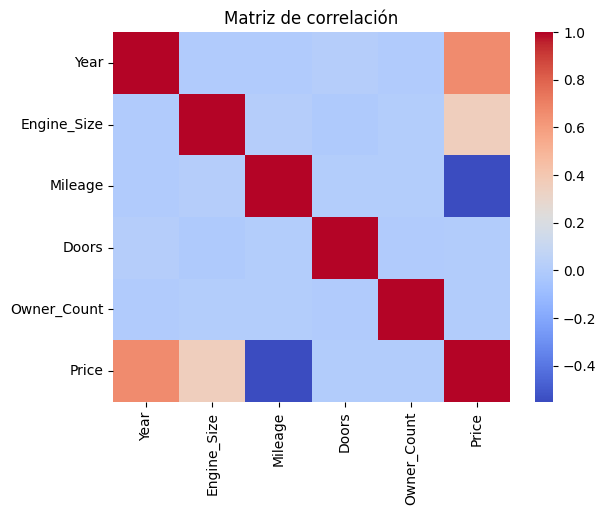

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

cars_aux = cars.select_dtypes(include=['number'])

matriz_corr = cars_aux.corr()

sns.heatmap(matriz_corr, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Se puede ver que las variables que más afectan al precio son:
* Kilometraje: Tiene una correlación negativa, lo que nos indica que a mayor cantidad de kilómetros recorridos por un vehículo, menor es su precio
* Año: Tiene una correlación positiva por lo que mientras más reciente sea el vehículo, mayor será su precio.
* Tamaño del motor: Sucede de forma similar que con el año de salida, aunque de las variables mencionadas esta es la que menos afecta al precio.

Habiendo revisado la documentación de la API y los múltiples parámetros que posee, las que se decidieron añadir a nuestro conjunto de datos son las siguientes:

* cylinders: Especifica el número de cilindros de un vehículo, teniendo en cuenta que el tamaño del motor guarda una coreelación positiva con el precio, esta varibale puede complementar bastante bien nuestro conjunto de datos.

* city_mpg: Nos indica la cantidad de millas recorridas por galón de combustible en ciudad, no está directamente relacionado a ninguna variable de nuestro conjunto de datos original pero teniendo en cuenta los precios del combustible puede llegar a ser un factor importante.

* highway_mpg: Nos indica la cantidad de millas recorridas por galón de combustible en autopista, similar a la variable anterior, no se relaciona directamente con ninguna variable en nuestro conjunto de datos original pero es un factor importante a tener en cuenta al momento de escoger un vehículo.

Para expandir nuestro conjunto de datos se buscarán las variables correspondientes en instancias de vehículos traídos de la API y se añadiran las columnas correspondientes al mismo.

Como primer paso se añaden las 3 nuevas columnas a nuestro Data Frame

In [88]:
#Se realiza una copia del conjunto de datos original para no modificarlo
extended_cars = cars.copy()

#Se añaden en este Data Frame las columnas nuevas
extended_cars['cylinders'] = np.nan
extended_cars['city_mpg'] = np.nan
extended_cars['highway_mpg'] = np.nan

Se hacen los correspondientes llamados a la API para obtener los datos que se desean agregar.

NOTA: Probando con la API hice un request para el Kia Rio 2020 que corresponde al primer vehículo en nuestro Data Frame, dado que tenemos 10000 filas pero 9999 request restantes, voy a añadir los datos del Kia Rio manualmente para aprovechar los request que nos quedan y de esa forma no abrir otra cuenta en API Ninjas.

In [93]:
extended_cars.at[0, 'cylinders'] = kia_rio['cylinders']
extended_cars.at[0, 'city_mpg'] = kia_rio['city_mpg']
extended_cars.at[0, 'highway_mpg'] = kia_rio['highway_mpg']

extended_cars.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,cylinders,city_mpg,highway_mpg
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,4.0,33.0,41.0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,4.0,33.0,41.0
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,4.0,33.0,41.0
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,4.0,33.0,41.0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,4.0,33.0,41.0


In [94]:
for index, row in extended_cars.iterrows():
  #Condición para saltar el Kia Rio
  if index == 0:
      continue
  else:
      #Se obtienen los datos de la API correspondientes
      api_values = get_car_specs(model=row['Model'], year=row['Year'])

      #Si no hubo coincidencia con el modelo y año del vehículo entonces se llena la columan con NaN
      if api_values is None:
          extended_cars.at[index, 'cylinders'] = np.nan
          extended_cars.at[index, 'city_mpg'] = np.nan
          extended_cars.at[index, 'highway_mpg'] = np.nan

      #Si hubo coincidencia con el modelo y año, se guardan los datos en nuestro Data Frame
      else:
          if api_values['cylinders'] is not None:

          extended_cars.at[index, 'cylinders'] = api_values['cylinders']
          extended_cars.at[index, 'city_mpg'] = api_values['city_mpg']
          extended_cars.at[index, 'highway_mpg'] = api_values['highway_mpg']

KeyError: 'cylinders'

In [96]:
print(api_values)

{'city_mpg': 78, 'class': 'small sport utility vehicle', 'combination_mpg': 76, 'drive': 'fwd', 'fuel_type': 'electricity', 'highway_mpg': 74, 'make': 'toyota', 'model': 'rav4 ev', 'transmission': 'a', 'year': 2013}


Es necesario modificar las instancias vacías en caso de que no hubiese coincidencia con la API, para eso se completaran dichas instancias con el valor promedio de la columna donde se encuentren.

In [95]:
#En caso de no haber coincidencia, los valores NaN se van a llenar con la media de los valores en la columna correspondiente
mean_cylinders = extended_cars['cylinders'].mean()
mean_city_mpg = extended_cars['city_mpg'].mean()
mean_highway_mpg = extended_cars['highway_mpg'].mean()

extended_cars['cylinders'].fillna(mean_cylinders, inplace=True)
extended_cars['city_mpg'].fillna(mean_city_mpg, inplace=True)
extended_cars['highway_mpg'].fillna(mean_highway_mpg, inplace=True)

extended_cars.head(10)

<ipython-input-95-c28751916523>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  extended_cars['cylinders'].fillna(mean_cylinders, inplace=True)
<ipython-input-95-c28751916523>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,cylinders,city_mpg,highway_mpg
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,4.0,33.0,41.0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,4.0,22.0,32.0
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,6.0,17.0,22.0
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,6.0,19.0,24.0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,4.0,29.0,40.0
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242,4.0,21.0,30.0
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208,4.0,25.0,36.0
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950,4.0,16.0,20.0
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926,4.0,20.0,26.0
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545,4.0,21.0,27.0
